<a href="https://colab.research.google.com/github/nngstnaa/POSTTEST-Kecerdasan-Buatan/blob/main/2209106086_Agustina_POSTTEST4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# POSTTEST 4 KECERDASAN BUATAN

**NIM**  **:** **2209106086**

**NAMA** **:** **AGUSTINA**

**KELAS** **:** **INFORMATIKA B2 2022**

**Pertama import library yang dibutuhkan**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from scipy import stats

In [11]:
df = pd.read_csv('/content/sample_data/tourism_dataset.csv')

# **DATA CLEANING**

In [12]:
#melihat jumlah missing value di masing-masing kolom
df.isnull().sum()

,0
Location,0
Country,0
Category,0
Visitors,0
Rating,0
Revenue,0
Accommodation_Available,0


### **Duplicate Data**

In [13]:
duplicate = df.duplicated().sum()
print('Jumlah nilai duplikat pada data: ', duplicate)

Jumlah nilai duplikat pada data:  0


**tidak ada data yang terduplicate**

In [14]:
df['Revenue'] = np.log(df['Revenue'] + 1)
df['Visitors'] = np.log(df['Visitors'] + 1)

In [15]:
# Buat fitur interaksi antara Revenue dan Visitors
df['Revenue_Visitors'] = df['Revenue'] * df['Visitors']

### **3.Handling Outlier**

**Sebelum melakukan handling outlier harus dilakukan dulu pengecekan outlier menggunakan boxplot seperti code dibawah ini**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Rating'>

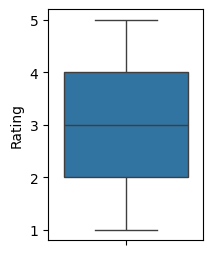

In [16]:
fig, ax = plt.subplots(figsize=(2,3)) #untuk frame/figure
sns.boxplot(df['Rating']) #untuk boxplot

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


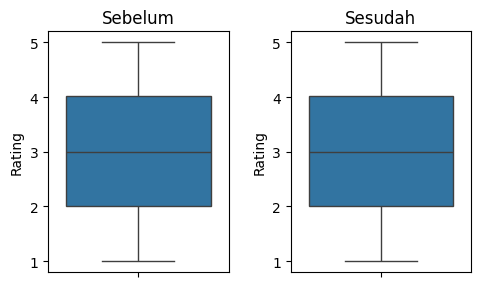

In [17]:
#sebelum handling oulier
fig, axes = plt.subplots(1,2, figsize=(5,3))
plt.tight_layout()
sns.boxplot(df['Rating'],orient='v',ax=axes[0])
axes[0].title.set_text("Sebelum")
# Menghitung Z-Score
df['Rating'] = df['Rating'][(np.abs(stats.zscore(df['Rating'])) <
3)]
#setelah handling oulier
sns.boxplot(df['Rating'],orient='v',ax=axes[1])
axes[1].title.set_text("Sesudah")
plt.show()

# **Scaling**

### **1.Normalisasi**
Saat normalisasi ini kita menggunakan teknik penskalaan sehingga memiliki rentang dari [0, 1]

Disini kita menggunakan metode
Min-Max Scalling.

In [18]:
from sklearn.preprocessing import MinMaxScaler
df.dtypes

,0
Location,object
Country,object
Category,object
Visitors,float64
Rating,float64
Revenue,float64
Accommodation_Available,object
Revenue_Visitors,float64


In [20]:
min_max = MinMaxScaler()
df[['Visitors', 'Revenue']] = min_max.fit_transform(df[['Visitors', 'Revenue']])

In [21]:
df['Revenue'].min()

0.0

In [22]:
df['Revenue'].max()

1.0

Setelah itu untuk kita mengetahui data yang sudah kita lakukan normalisasi kita dapat menggunakan DataFrame ['nama kolom yang sudah di normalisasi'].min() / max() . Dari output kode diatas kita dapat melihat bahwa nilai max bernilai 1 dan min bernilai 0, artinya penskalaan data dengan normalisasi sudah berhasil.

### **2.Standarisasi**

- Standarisasi merupakan proses menjadikan data memiliki rata-rata 0 dan
standar deviasi 1.

- Lalu import library standar scaler dari preprocessing

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
ss = StandardScaler()
df = df.copy()
df[['Visitors', 'Revenue']] = ss.fit_transform(df[['Visitors', 'Revenue']])

In [25]:
df['Visitors'].std()

1.0000834968481422

Setelah itu untuk kita mengetahui data yang sudah kita lakukan standarisasi kita dapat menggunakan df['nama kolom yang sudah di standarisasi'].std() . Dari output kode diatas kita dapat melihat bahwa standar deviasi bernilai 1, artinya penskalaan data dengan standarisasi sudah berhasil.

### **A1.Linear Regression, jika menggunakan label Numerik pada dataset kalian (Regresi).**

In [26]:
imputer = SimpleImputer(strategy='mean')

# Terapkan imputasi pada kolom yang memiliki missing values
df['Visitors'] = imputer.fit_transform(df[['Visitors']])

In [27]:
# X adalah fitur (independent variables), termasuk fitur interaksi baru
X = df[['Revenue', 'Visitors', 'Revenue_Visitors']]

# y adalah target (dependent variable) yaitu Visitors
y = df['Visitors']

In [28]:
# Membagi dataset menjadi training set dan test set (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
# Inisialisasi scaler
scaler = MinMaxScaler()

# Fit scaler pada data training dan transformasi data training
X_train_scaled = scaler.fit_transform(X_train)

# Transformasi data testing dengan scaler yang sama
X_test_scaled = scaler.transform(X_test)

In [30]:
# Inisialisasi model Linear Regression
linear_model = LinearRegression()

# Melatih model menggunakan data training
linear_model.fit(X_train, y_train)

LinearRegression()

In [32]:
# Inisialisasi model Support Vector Regressor
supvecreg_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

# Melatih model menggunakan data training
supvecreg_model.fit(X_train, y_train)

SVR(C=100, gamma=0.1)

### **A2.Regresi: MAE, MSE, RMSE, dan R2-Score**

In [34]:
# Prediksi nilai target pada data testing
y_predicSvr = supvecreg_model.predict(X_test)
y_predictLin = linear_model.predict(X_test)

In [36]:
  # Evaluasi performa SV Linier
maeLin = mean_absolute_error(y_test, y_predictLin)
mseLin = mean_squared_error(y_test, y_predictLin)
rmseLin = np.sqrt(mseLin)
r2Lin = r2_score(y_test, y_predictLin)

print(f"Lin - MAE: {maeLin}")
print(f"Lin - MSE: {mseLin}")
print(f"Lin - RMSE: {rmseLin}")
print(f"Lin - R²-Score: {r2Lin}")

Lin - MAE: 3.430720963838336e-15
Lin - MSE: 2.148911312691561e-29
Lin - RMSE: 4.63563513738038e-15
Lin - R²-Score: 1.0


 Hasil prediksi dari Linear Regression dievaluasi menggunakan beberapa metrik:

MAE (Mean Absolute Error): Rata-rata perbedaan absolut antara prediksi dan nilai sebenarnya.
MSE (Mean Squared Error): Rata-rata kuadrat dari kesalahan prediksi.
RMSE (Root Mean Squared Error): Akar kuadrat dari MSE, mengukur kesalahan dalam satuan yang sama dengan target asli.
R² (R-squared): Menunjukkan seberapa baik model menjelaskan variabilitas data target.
Metrik ini dicetak untuk menilai performa model Linear Regression.

In [37]:
  # Evaluasi performa SVR
maeSvr = mean_absolute_error(y_test, y_predicSvr)
mseSvr = mean_squared_error(y_test, y_predicSvr)
rmseSvr = np.sqrt(mseSvr)
r2Svr = r2_score(y_test, y_predicSvr)

print(f"SVR - MAE: {maeSvr}")
print(f"SVR - MSE: {mseSvr}")
print(f"SVR - RMSE: {rmseSvr}")
print(f"SVR - R²-Score: {r2Svr}")

SVR - MAE: 0.06445906444814434
SVR - MSE: 0.006141684150904919
SVR - RMSE: 0.07836889785434602
SVR - R²-Score: 0.9942146714580193


 Hasil prediksi dari Support Vector Regresor dievaluasi menggunakan beberapa metrik:

MAE (Mean Absolute Error):
Mengukur rata-rata perbedaan absolut antara nilai prediksi SVR (y_predicSvr) dan nilai sebenarnya (y_test).

MSE (Mean Squared Error):
Menghitung rata-rata kuadrat dari kesalahan prediksi SVR.

RMSE (Root Mean Squared Error):
Akar kuadrat dari MSE, yang memberikan ukuran kesalahan dalam satuan yang sama dengan target asli.

R² (R-squared) Score:
Menunjukkan seberapa baik model SVR menjelaskan variabilitas data target. Semakin dekat nilai ini ke 1, semakin baik modelnya.

Setelah menghitung metrik tersebut, hasilnya dicetak untuk menilai seberapa akurat model SVR memprediksi data uji.

### **A3.Buat plot untuk hasil prediksi-nya (wajib) se-menarik dan se-informatif mungkin.**

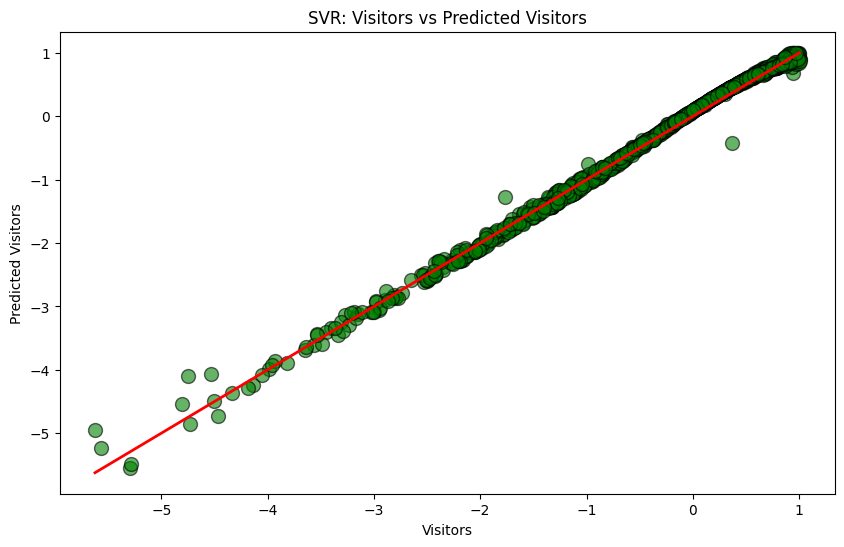

In [39]:
# Plot prediksi SVR vs nilai asli
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_predicSvr, color='green', edgecolor='k', alpha=0.6, s=100)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Visitors')
plt.ylabel('Predicted Visitors')
plt.title('SVR: Visitors vs Predicted Visitors')
plt.show()

Berikut adalah hasil dari perbandingan antara data asli dan data prediksi dari Visitors